<a href="https://colab.research.google.com/github/dspierre/data-ia/blob/dspierre-machinelearning/projet_prediction_eletectique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from fbprophet import Prophet
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
plt.style.use('fivethirtyeight') # For plots
print("fait")

fait


In [ ]:
df_electric=pd.read_csv('/content/sample_data/AEP_hourly.csv', sep=',')
df_electric2=df_movie=pd.read_csv('/content/sample_data/COMED_hourly.csv', sep=',')
df_electric3=df_movie=pd.read_csv('/content/sample_data/COMED_hourly.csv', sep=',')
df_electric

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [ ]:
df_electric2

,Datetime,COMED_MW
0,2011-12-31 01:00:00,9970.0
1,2011-12-31 02:00:00,9428.0
2,2011-12-31 03:00:00,9059.0
3,2011-12-31 04:00:00,8817.0
4,2011-12-31 05:00:00,8743.0
...,...,...
66492,2018-01-01 20:00:00,13858.0
66493,2018-01-01 21:00:00,13758.0
66494,2018-01-01 22:00:00,13627.0
66495,2018-01-01 23:00:00,13336.0


In [ ]:
df_electric3

,Datetime,COMED_MW
0,2011-12-31 01:00:00,9970.0
1,2011-12-31 02:00:00,9428.0
2,2011-12-31 03:00:00,9059.0
3,2011-12-31 04:00:00,8817.0
4,2011-12-31 05:00:00,8743.0
...,...,...
66492,2018-01-01 20:00:00,13858.0
66493,2018-01-01 21:00:00,13758.0
66494,2018-01-01 22:00:00,13627.0
66495,2018-01-01 23:00:00,13336.0


In [ ]:
pjme = pd.read_csv('/content/sample_data/PJME_hourly.csv', index_col=[0], parse_dates=[0])
pjme

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


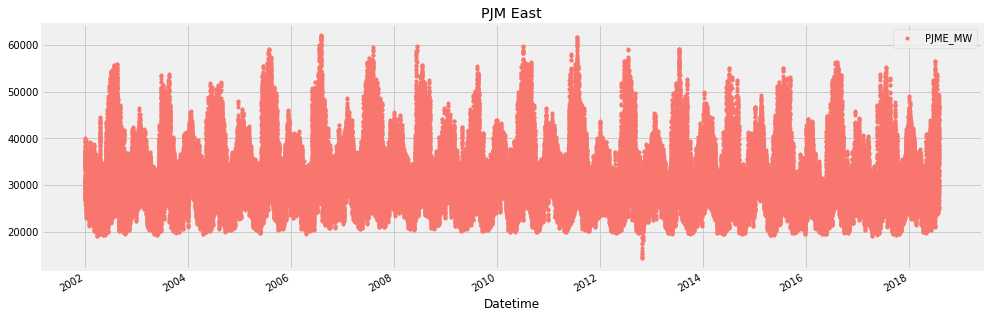

In [ ]:
# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
pjme.plot(style='.', figsize=(15,5), color=color_pal[0], title='PJM East')
plt.show()

In [ ]:
def create_features(df, label=None):
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X
X, y = create_features(pjme, label='PJME_MW')
features_and_target = pd.concat([X, y], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [ ]:
# See our features and target
features_and_target.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,PJME_MW
Datetime,,,,,,,,,
2002-12-31 01:00:00,1,1,4,12,2002,365,31,1,26498.0
2002-12-31 02:00:00,2,1,4,12,2002,365,31,1,25147.0
2002-12-31 03:00:00,3,1,4,12,2002,365,31,1,24574.0
2002-12-31 04:00:00,4,1,4,12,2002,365,31,1,24393.0
2002-12-31 05:00:00,5,1,4,12,2002,365,31,1,24860.0


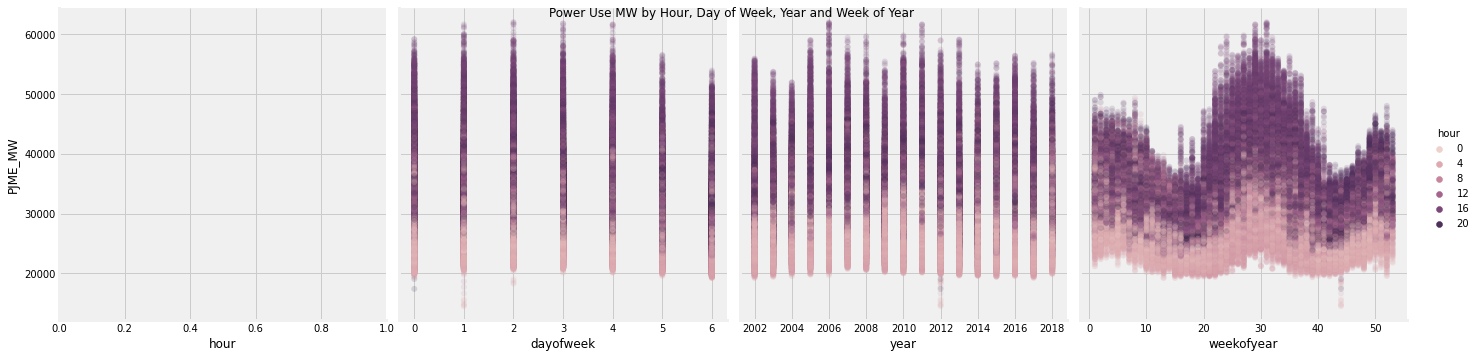

In [ ]:
sns.pairplot(features_and_target.dropna(),
             hue='hour',
             x_vars=['hour','dayofweek',
                     'year','weekofyear'],
             y_vars='PJME_MW',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0} )
plt.suptitle('Power Use MW by Hour, Day of Week, Year and Week of Year')
plt.show()

In [ ]:
split_date = '01-Jan-2015'
pjme_train = pjme.loc[pjme.index <= split_date].copy()
pjme_test = pjme.loc[pjme.index > split_date].copy()

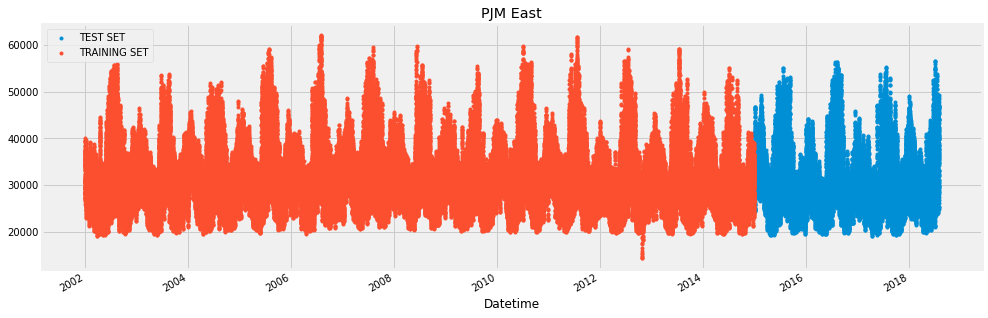

In [ ]:
# Plot train and test so you can see where we have split
pjme_test \
    .rename(columns={'PJME_MW': 'TEST SET'}) \
    .join(pjme_train.rename(columns={'PJME_MW': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(15,5), title='PJM East', style='.')
plt.show()

#Simple Prophet Model

In [ ]:
# Format data for prophet model using ds and y
pjme_train.reset_index() \
    .rename(columns={'Datetime':'ds',
                     'PJME_MW':'y'}).head()

,ds,y
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [ ]:
# Setup and train model and fit
model = Prophet()
model.fit(pjme_train.reset_index() \
              .rename(columns={'Datetime':'ds',
                               'PJME_MW':'y'}))

In [ ]:
# Predict on training set with model
pjme_test_fcst = model.predict(df=pjme_test.reset_index() \
                                   .rename(columns={'Datetime':'ds'}))
pjme_test_fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,31190.115784,24043.519098,32933.959573,31190.115784,31190.115784,-2820.067931,-2820.067931,-2820.067931,-4430.324151,-4430.324151,-4430.324151,1281.432109,1281.432109,1281.432109,328.824111,328.824111,328.824111,0.0,0.0,0.0,28370.047853
1,2015-01-01 02:00:00,31190.075956,22512.496584,31337.517333,31190.075956,31190.075956,-4324.359473,-4324.359473,-4324.359473,-5927.199911,-5927.199911,-5927.199911,1272.673300,1272.673300,1272.673300,330.167138,330.167138,330.167138,0.0,0.0,0.0,26865.716483
2,2015-01-01 03:00:00,31190.036128,21701.672237,30305.655130,31190.036128,31190.036128,-5196.010627,-5196.010627,-5196.010627,-6790.271265,-6790.271265,-6790.271265,1262.709009,1262.709009,1262.709009,331.551628,331.551628,331.551628,0.0,0.0,0.0,25994.025500
3,2015-01-01 04:00:00,31189.996300,21281.177501,30323.215694,31189.996300,31189.996300,-5337.553296,-5337.553296,-5337.553296,-6922.193706,-6922.193706,-6922.193706,1251.662803,1251.662803,1251.662803,332.977607,332.977607,332.977607,0.0,0.0,0.0,25852.443003
4,2015-01-01 05:00:00,31189.956472,21980.109188,30921.992165,31189.956472,31189.956472,-4663.215490,-4663.215490,-4663.215490,-6237.331039,-6237.331039,-6237.331039,1239.670450,1239.670450,1239.670450,334.445099,334.445099,334.445099,0.0,0.0,0.0,26526.740982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31434,2018-08-02 20:00:00,29938.124037,-5118.563623,93951.643446,-17386.696802,80652.467578,11242.397117,11242.397117,11242.397117,4451.108138,4451.108138,4451.108138,1033.902684,1033.902684,1033.902684,5757.386295,5757.386295,5757.386295,0.0,0.0,0.0,41180.521154
31435,2018-08-02 21:00:00,29938.084209,-6613.687506,90887.666642,-17390.040044,80655.112932,10469.610842,10469.610842,10469.610842,3695.889278,3695.889278,3695.889278,1021.282015,1021.282015,1021.282015,5752.439549,5752.439549,5752.439549,0.0,0.0,0.0,40407.695051
31436,2018-08-02 22:00:00,29938.044381,-7973.251931,90674.966592,-17393.163057,80657.758287,8840.382184,8840.382184,8840.382184,2084.388413,2084.388413,2084.388413,1008.502465,1008.502465,1008.502465,5747.491306,5747.491306,5747.491306,0.0,0.0,0.0,38778.426565
31437,2018-08-02 23:00:00,29938.004553,-11419.853774,88066.458368,-17395.037709,80660.403642,6632.633503,6632.633503,6632.633503,-105.278092,-105.278092,-105.278092,995.369940,995.369940,995.369940,5742.541656,5742.541656,5742.541656,0.0,0.0,0.0,36570.638056


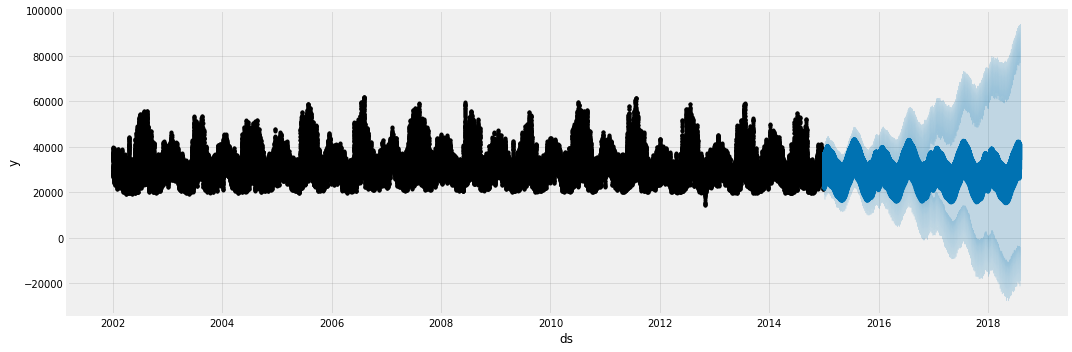

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(pjme_test_fcst,
                 ax=ax)
plt.show()

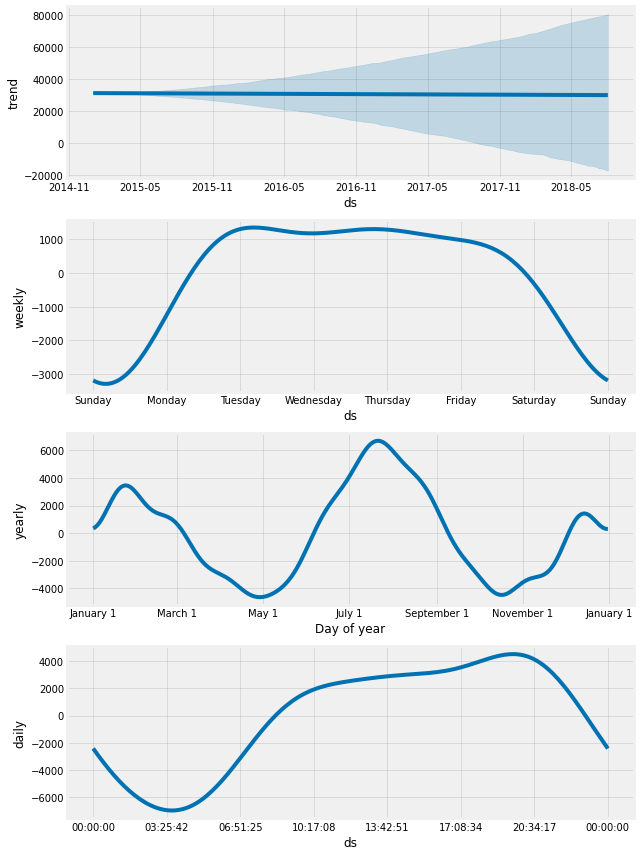

In [ ]:
# Plot the components of the model
fig = model.plot_components(pjme_test_fcst)

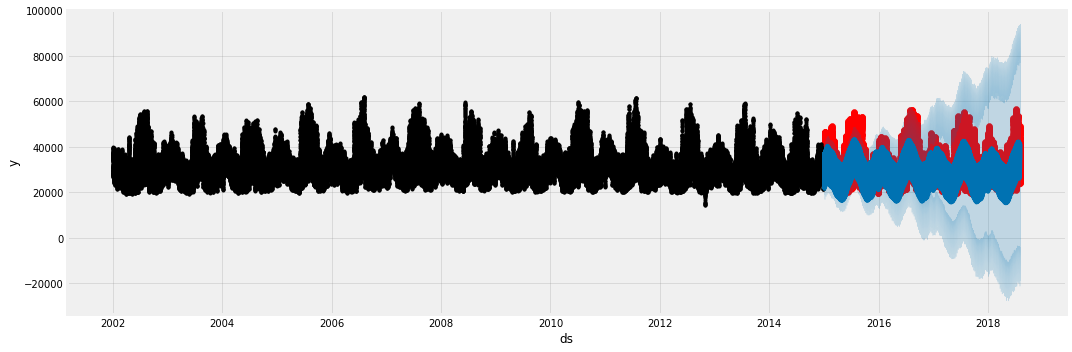

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.index, pjme_test['PJME_MW'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)

#Look at first month of predictions

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=pjme_test['PJME_MW'],
                   y_pred=pjme_test_fcst['yhat'])

43851823.35057676

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true=pjme_test['PJME_MW'],
                   y_pred=pjme_test_fcst['yhat'])

5185.54679246028

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=pjme_test['PJME_MW'],
                   y_pred=pjme_test_fcst['yhat'])

16.503989655716325

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
train_holidays = cal.holidays(start=pjme_train.index.min(),
                              end=pjme_train.index.max())
test_holidays = cal.holidays(start=pjme_test.index.min(),
                             end=pjme_test.index.max())

In [ ]:
train_holidays

DatetimeIndex(['2002-01-21', '2002-02-18', '2002-05-27', '2002-07-04',
               '2002-09-02', '2002-10-14', '2002-11-11', '2002-11-28',
               '2002-12-25', '2003-01-01',
               ...
               '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04',
               '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27',
               '2014-12-25', '2015-01-01'],
              dtype='datetime64[ns]', length=130, freq=None)

In [ ]:
test_holidays

DatetimeIndex(['2015-01-19', '2015-02-16', '2015-05-25', '2015-07-03',
               '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26',
               '2015-12-25', '2016-01-01', '2016-01-18', '2016-02-15',
               '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-11-11', '2016-11-24', '2016-12-26', '2017-01-02',
               '2017-01-16', '2017-02-20', '2017-05-29', '2017-07-04',
               '2017-09-04', '2017-10-09', '2017-11-10', '2017-11-23',
               '2017-12-25', '2018-01-01', '2018-01-15', '2018-02-19',
               '2018-05-28', '2018-07-04'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
# Create a dataframe with holiday, ds columns
pjme['date'] = pjme.index.date
pjme['is_holiday'] = pjme.date.isin([d.date() for d in cal.holidays()])
holiday_df = pjme.loc[pjme['is_holiday']] \
    .reset_index() \
    .rename(columns={'Datetime':'ds'})
holiday_df['holiday'] = 'USFederalHoliday'
holiday_df = holiday_df.drop(['PJME_MW','date','is_holiday'], axis=1)
holiday_df.head()

,ds,holiday
0,2003-01-01 00:00:00,USFederalHoliday
1,2002-12-25 01:00:00,USFederalHoliday
2,2002-12-25 02:00:00,USFederalHoliday
3,2002-12-25 03:00:00,USFederalHoliday
4,2002-12-25 04:00:00,USFederalHoliday


In [ ]:
holiday_df['ds'] = pd.to_datetime(holiday_df['ds'])
holiday_df['ds']

0      2003-01-01 00:00:00
1      2002-12-25 01:00:00
2      2002-12-25 02:00:00
3      2002-12-25 03:00:00
4      2002-12-25 04:00:00
               ...        
3954   2018-01-01 19:00:00
3955   2018-01-01 20:00:00
3956   2018-01-01 21:00:00
3957   2018-01-01 22:00:00
3958   2018-01-01 23:00:00
Name: ds, Length: 3959, dtype: datetime64[ns]

In [ ]:
# Setup and train model with holidays
model_with_holidays = Prophet(holidays=holiday_df)
model_with_holidays.fit(pjme_train.reset_index() \
                            .rename(columns={'Datetime':'ds',
                                             'PJME_MW':'y'}))

In [ ]:
# Predict on training set with model
pjme_test_fcst_with_hols = model_with_holidays.predict(df=pjme_test.reset_index().rename(columns={'Datetime':'ds'}))
pjme_test_fcst_with_hols

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,USFederalHoliday,USFederalHoliday_lower,USFederalHoliday_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,31255.857183,22210.334118,30972.720668,31255.857183,31255.857183,-1833.675263,-1833.675263,-1833.675263,-4489.806673,-4489.806673,-4489.806673,-4430.509720,-4430.509720,-4430.509720,-1833.675263,-1833.675263,-1833.675263,1292.816418,1292.816418,1292.816418,481.561893,481.561893,481.561893,0.0,0.0,0.0,26766.050510
1,2015-01-01 02:00:00,31255.818943,20551.086230,29708.156854,31255.818943,31255.818943,-1833.675263,-1833.675263,-1833.675263,-5993.250310,-5993.250310,-5993.250310,-5927.499634,-5927.499634,-5927.499634,-1833.675263,-1833.675263,-1833.675263,1285.020771,1285.020771,1285.020771,482.903816,482.903816,482.903816,0.0,0.0,0.0,25262.568633
2,2015-01-01 03:00:00,31255.780703,20203.868995,28965.367385,31255.780703,31255.780703,-1833.675263,-1833.675263,-1833.675263,-6864.274976,-6864.274976,-6864.274976,-6790.546288,-6790.546288,-6790.546288,-1833.675263,-1833.675263,-1833.675263,1275.663167,1275.663167,1275.663167,484.283408,484.283408,484.283408,0.0,0.0,0.0,24391.505727
3,2015-01-01 04:00:00,31255.742463,19860.231979,28542.928415,31255.742463,31255.742463,-1833.675263,-1833.675263,-1833.675263,-7005.424056,-7005.424056,-7005.424056,-6922.326332,-6922.326332,-6922.326332,-1833.675263,-1833.675263,-1833.675263,1264.876841,1264.876841,1264.876841,485.700697,485.700697,485.700697,0.0,0.0,0.0,24250.318406
4,2015-01-01 05:00:00,31255.704222,20693.364960,29283.419337,31255.704222,31255.704222,-1833.675263,-1833.675263,-1833.675263,-6331.014343,-6331.014343,-6331.014343,-6237.306549,-6237.306549,-6237.306549,-1833.675263,-1833.675263,-1833.675263,1252.811759,1252.811759,1252.811759,487.155710,487.155710,487.155710,0.0,0.0,0.0,24924.689879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31434,2018-08-02 20:00:00,30053.773241,-8625.790253,92567.534748,-19505.884556,80836.538995,0.000000,0.000000,0.000000,11176.707310,11176.707310,11176.707310,4451.111879,4451.111879,4451.111879,0.000000,0.000000,0.000000,1024.529740,1024.529740,1024.529740,5701.065690,5701.065690,5701.065690,0.0,0.0,0.0,41230.480551
31435,2018-08-02 21:00:00,30053.735001,-8793.094701,91163.972285,-19507.742876,80838.985837,0.000000,0.000000,0.000000,10402.403576,10402.403576,10402.403576,3695.944086,3695.944086,3695.944086,0.000000,0.000000,0.000000,1010.406184,1010.406184,1010.406184,5696.053307,5696.053307,5696.053307,0.0,0.0,0.0,40456.138577
31436,2018-08-02 22:00:00,30053.696761,-9648.370535,89443.430869,-19509.601195,80841.432680,0.000000,0.000000,0.000000,8771.821504,8771.821504,8771.821504,2084.505312,2084.505312,2084.505312,0.000000,0.000000,0.000000,996.275953,996.275953,996.275953,5691.040239,5691.040239,5691.040239,0.0,0.0,0.0,38825.518265
31437,2018-08-02 23:00:00,30053.658520,-11659.574576,86839.138343,-19511.459515,80843.879522,0.000000,0.000000,0.000000,6562.815240,6562.815240,6562.815240,-105.170942,-105.170942,-105.170942,0.000000,0.000000,0.000000,981.959604,981.959604,981.959604,5686.026579,5686.026579,5686.026579,0.0,0.0,0.0,36616.473760


In [ ]:
jul4_test = pjme_test.query('Datetime >= 20160407 and Datetime < 20160408')
jul4_pred = pjme_test_fcst.query('ds >= 20160407 and ds < 20160408')
jul4_pred_holiday_model = pjme_test_fcst_with_hols.query('ds >= 20160407 and ds < 20160408')

In [ ]:
mean_absolute_error(y_true=jul4_test['PJME_MW'],
                   y_pred=jul4_pred['yhat'])

2153.7284326547356

In [ ]:
mean_absolute_error(y_true=jul4_test['PJME_MW'],
                   y_pred=jul4_pred_holiday_model['yhat'])

2154.6261571056853

In [ ]:
holiday_list = holiday_df['ds'].tolist()

In [ ]:
hols_test = pjme_test.query('Datetime in @holiday_list')
hols_pred = pjme_test_fcst.query('ds in @holiday_list')
hols_pred_holiday_model = pjme_test_fcst_with_hols.query('ds in @holiday_list')

In [ ]:
hols_test

,PJME_MW
Datetime,
2016-01-01 00:00:00,26686.0
2015-12-25 01:00:00,22862.0
2015-12-25 02:00:00,21494.0
2015-12-25 03:00:00,20626.0
2015-12-25 04:00:00,20165.0
...,...
2018-01-01 19:00:00,44343.0
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0


In [ ]:
hols_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,31190.115784,24043.519098,32933.959573,31190.115784,31190.115784,-2820.067931,-2820.067931,-2820.067931,-4430.324151,-4430.324151,-4430.324151,1281.432109,1281.432109,1281.432109,328.824111,328.824111,328.824111,0.0,0.0,0.0,28370.047853
1,2015-01-01 02:00:00,31190.075956,22512.496584,31337.517333,31190.075956,31190.075956,-4324.359473,-4324.359473,-4324.359473,-5927.199911,-5927.199911,-5927.199911,1272.673300,1272.673300,1272.673300,330.167138,330.167138,330.167138,0.0,0.0,0.0,26865.716483
2,2015-01-01 03:00:00,31190.036128,21701.672237,30305.655130,31190.036128,31190.036128,-5196.010627,-5196.010627,-5196.010627,-6790.271265,-6790.271265,-6790.271265,1262.709009,1262.709009,1262.709009,331.551628,331.551628,331.551628,0.0,0.0,0.0,25994.025500
3,2015-01-01 04:00:00,31189.996300,21281.177501,30323.215694,31189.996300,31189.996300,-5337.553296,-5337.553296,-5337.553296,-6922.193706,-6922.193706,-6922.193706,1251.662803,1251.662803,1251.662803,332.977607,332.977607,332.977607,0.0,0.0,0.0,25852.443003
4,2015-01-01 05:00:00,31189.956472,21980.109188,30921.992165,31189.956472,31189.956472,-4663.215490,-4663.215490,-4663.215490,-6237.331039,-6237.331039,-6237.331039,1239.670450,1239.670450,1239.670450,334.445099,334.445099,334.445099,0.0,0.0,0.0,26526.740982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30737,2018-07-04 19:00:00,29965.884121,-5214.770713,89325.871554,-15134.279962,79045.554286,10414.519075,10414.519075,10414.519075,4420.485818,4420.485818,4420.485818,1304.008003,1304.008003,1304.008003,4690.025253,4690.025253,4690.025253,0.0,0.0,0.0,40380.403196
30738,2018-07-04 20:00:00,29965.844293,-5737.297711,89378.681399,-15136.961386,79047.752134,10452.577058,10452.577058,10452.577058,4451.108138,4451.108138,4451.108138,1304.041033,1304.041033,1304.041033,4697.427887,4697.427887,4697.427887,0.0,0.0,0.0,40418.421351
30739,2018-07-04 21:00:00,29965.804465,-4400.728071,88295.241894,-15139.642809,79049.949982,9703.257149,9703.257149,9703.257149,3695.889278,3695.889278,3695.889278,1302.535000,1302.535000,1302.535000,4704.832870,4704.832870,4704.832870,0.0,0.0,0.0,39669.061614
30740,2018-07-04 22:00:00,29965.764637,-7197.095519,86613.778155,-15142.324233,79052.147830,8096.115252,8096.115252,8096.115252,2084.388413,2084.388413,2084.388413,1299.486724,1299.486724,1299.486724,4712.240114,4712.240114,4712.240114,0.0,0.0,0.0,38061.879889


In [ ]:
hols_pred_holiday_model

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,USFederalHoliday,USFederalHoliday_lower,USFederalHoliday_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,31255.857183,22210.334118,30972.720668,31255.857183,31255.857183,-1833.675263,-1833.675263,-1833.675263,-4489.806673,-4489.806673,-4489.806673,-4430.509720,-4430.509720,-4430.509720,-1833.675263,-1833.675263,-1833.675263,1292.816418,1292.816418,1292.816418,481.561893,481.561893,481.561893,0.0,0.0,0.0,26766.050510
1,2015-01-01 02:00:00,31255.818943,20551.086230,29708.156854,31255.818943,31255.818943,-1833.675263,-1833.675263,-1833.675263,-5993.250310,-5993.250310,-5993.250310,-5927.499634,-5927.499634,-5927.499634,-1833.675263,-1833.675263,-1833.675263,1285.020771,1285.020771,1285.020771,482.903816,482.903816,482.903816,0.0,0.0,0.0,25262.568633
2,2015-01-01 03:00:00,31255.780703,20203.868995,28965.367385,31255.780703,31255.780703,-1833.675263,-1833.675263,-1833.675263,-6864.274976,-6864.274976,-6864.274976,-6790.546288,-6790.546288,-6790.546288,-1833.675263,-1833.675263,-1833.675263,1275.663167,1275.663167,1275.663167,484.283408,484.283408,484.283408,0.0,0.0,0.0,24391.505727
3,2015-01-01 04:00:00,31255.742463,19860.231979,28542.928415,31255.742463,31255.742463,-1833.675263,-1833.675263,-1833.675263,-7005.424056,-7005.424056,-7005.424056,-6922.326332,-6922.326332,-6922.326332,-1833.675263,-1833.675263,-1833.675263,1264.876841,1264.876841,1264.876841,485.700697,485.700697,485.700697,0.0,0.0,0.0,24250.318406
4,2015-01-01 05:00:00,31255.704222,20693.364960,29283.419337,31255.704222,31255.704222,-1833.675263,-1833.675263,-1833.675263,-6331.014343,-6331.014343,-6331.014343,-6237.306549,-6237.306549,-6237.306549,-1833.675263,-1833.675263,-1833.675263,1252.811759,1252.811759,1252.811759,487.155710,487.155710,487.155710,0.0,0.0,0.0,24924.689879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30737,2018-07-04 19:00:00,30080.426733,-9232.871603,86156.186548,-17991.545750,78171.694635,-1833.675263,-1833.675263,-1833.675263,8637.748814,8637.748814,8637.748814,4420.497644,4420.497644,4420.497644,-1833.675263,-1833.675263,-1833.675263,1302.213625,1302.213625,1302.213625,4748.712808,4748.712808,4748.712808,0.0,0.0,0.0,38718.175547
30738,2018-07-04 20:00:00,30080.388492,-8569.917874,87189.711564,-17993.871841,78172.977963,-1833.675263,-1833.675263,-1833.675263,8678.859936,8678.859936,8678.859936,4451.111879,4451.111879,4451.111879,-1833.675263,-1833.675263,-1833.675263,1305.270858,1305.270858,1305.270858,4756.152462,4756.152462,4756.152462,0.0,0.0,0.0,38759.248428
30739,2018-07-04 21:00:00,30080.350252,-9667.316822,86932.470954,-17996.197931,78174.261291,-1833.675263,-1833.675263,-1833.675263,7932.342616,7932.342616,7932.342616,3695.944086,3695.944086,3695.944086,-1833.675263,-1833.675263,-1833.675263,1306.480868,1306.480868,1306.480868,4763.592926,4763.592926,4763.592926,0.0,0.0,0.0,38012.692869
30740,2018-07-04 22:00:00,30080.312012,-12008.840879,85606.802256,-17998.524022,78175.544618,-1833.675263,-1833.675263,-1833.675263,6327.683488,6327.683488,6327.683488,2084.505312,2084.505312,2084.505312,-1833.675263,-1833.675263,-1833.675263,1305.819327,1305.819327,1305.819327,4771.034113,4771.034113,4771.034113,0.0,0.0,0.0,36407.995500


In [ ]:
mean_absolute_error(y_true=hols_test['PJME_MW'],
                   y_pred=hols_pred['yhat'])


5232.115798607173

In [ ]:
mean_absolute_error(y_true=hols_test['PJME_MW'],
                   y_pred=hols_pred_holiday_model['yhat'])

5125.940383436851

# Identify Error by holiday

In [ ]:

for hol, d in holiday_df.groupby('ds'):
    holiday_list = d['ds'].tolist()
    hols_test = pjme_test.query('Datetime in @holiday_list')
    if len(hols_test) == 0:
        continue
    hols_pred = pjme_test_fcst.query('ds in @holiday_list')
    hols_pred_holiday_model = pjme_test_fcst_with_hols.query('ds in @holiday_list')
    non_hol_error = mean_absolute_error(y_true=hols_test['PJME_MW'],
                   y_pred=hols_pred['yhat'])
    hol_model_error = mean_absolute_error(y_true=hols_test['PJME_MW'],
                       y_pred=hols_pred_holiday_model['yhat'])
    diff = non_hol_error - hol_model_error
    print(f'Holiday: {hol:%B %d, %Y}:    \n MAE (non-holiday model): {non_hol_error:0.1f} \n MAE (Holiday Model): {hol_model_error:0.1f} \n Diff {diff:0.1f}')

Holiday: January 01, 2015:    
 MAE (non-holiday model): 3277.0 
 MAE (Holiday Model): 4880.9 
 Diff -1604.0
Holiday: January 01, 2015:    
 MAE (non-holiday model): 3889.3 
 MAE (Holiday Model): 5492.4 
 Diff -1603.1
Holiday: January 01, 2015:    
 MAE (non-holiday model): 4195.0 
 MAE (Holiday Model): 5797.5 
 Diff -1602.5
Holiday: January 01, 2015:    
 MAE (non-holiday model): 4037.6 
 MAE (Holiday Model): 5639.7 
 Diff -1602.1
Holiday: January 01, 2015:    
 MAE (non-holiday model): 3548.3 
 MAE (Holiday Model): 5150.3 
 Diff -1602.1
Holiday: January 01, 2015:    
 MAE (non-holiday model): 2753.5 
 MAE (Holiday Model): 4355.9 
 Diff -1602.4
Holiday: January 01, 2015:    
 MAE (non-holiday model): 1719.0 
 MAE (Holiday Model): 3322.1 
 Diff -1603.1
Holiday: January 01, 2015:    
 MAE (non-holiday model): 59.8 
 MAE (Holiday Model): 1544.4 
 Diff -1484.6
Holiday: January 01, 2015:    
 MAE (non-holiday model): 1697.1 
 MAE (Holiday Model): 91.7 
 Diff 1605.4
Holiday: January 01, 201

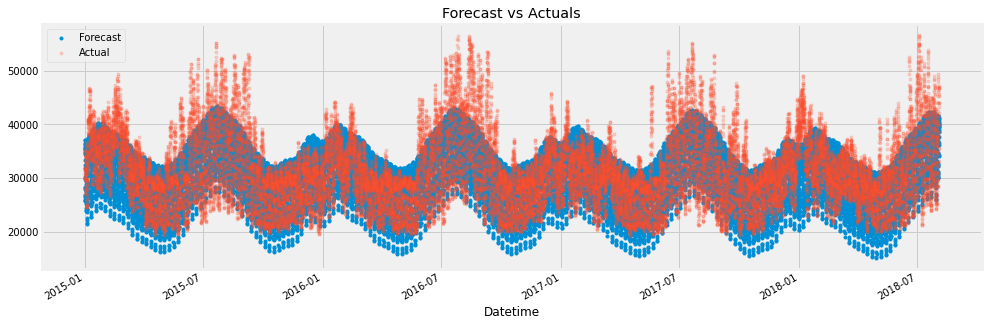

In [ ]:
ax = pjme_test_fcst.set_index('ds')['yhat'].plot(figsize=(15, 5),
                                                 lw=0,
                                                 style='.')
pjme_test['PJME_MW'].plot(ax=ax,
                          style='.',
                          lw=0,
                          alpha=0.2)
plt.legend(['Forecast','Actual'])
plt.title('Forecast vs Actuals')
plt.show()

# Data Cleaning

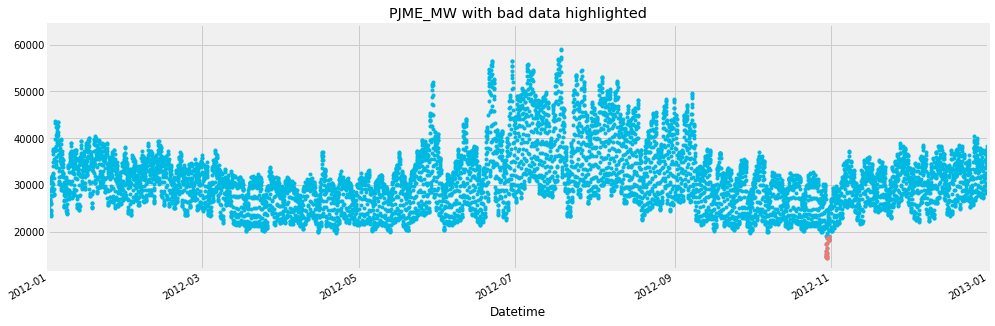

In [ ]:
ax = pjme_train.plot(style='.',
                     figsize=(15,5),
                     color=color_pal[5],
                     title='PJME_MW with bad data highlighted',
                     xlim=('01-01-2012','01-01-2013')
                    )
pjme_train.query('PJME_MW < 19000').plot(style='.',
                                             figsize=(15,5),
                                             color=color_pal[0],
                                             ax=ax)
ax.legend().set_visible(False)
plt.show()

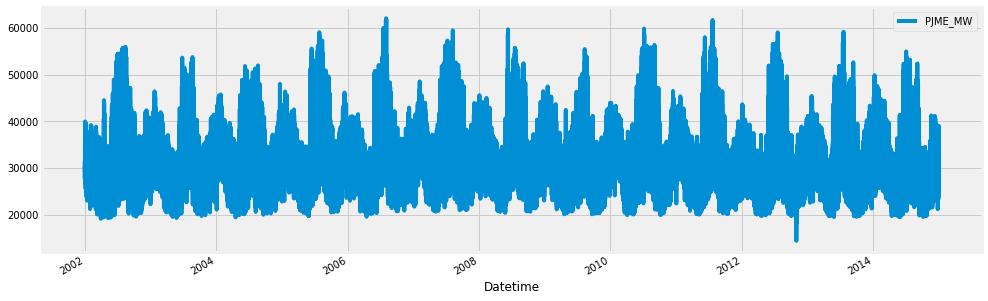

In [ ]:
pjme_train.plot(figsize=(15, 5))
plt.show()

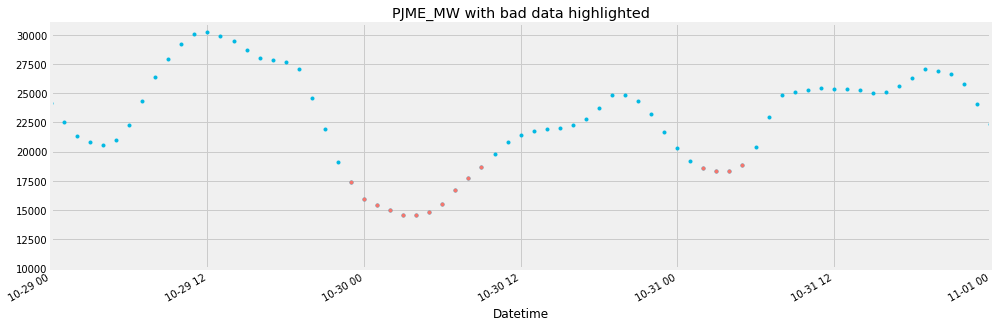

In [ ]:
ax = pjme_train.plot(style='.',
                     figsize=(15,5),
                     color=color_pal[5],
                     title='PJME_MW with bad data highlighted',
                     xlim=('10-29-2012','11-01-2012'),
                     ylim=(10000, 31000)
                    )
pjme_train.query('PJME_MW < 19000').plot(style='.',
                                             figsize=(15,5),
                                             color=color_pal[0],
                                             ax=ax)
ax.legend().set_visible(False)
plt.show()

In [ ]:
# Clean Data
pjme_train['PJME_MW_clean'] = pjme_train['PJME_MW']
pjme_train.loc[pjme_train['PJME_MW'] < 19000, 'PJME_MW_clean'] = np.nan

# Train model on clean data
model = Prophet()
model.fit(pjme_train.reset_index() \
              .rename(columns={'Datetime':'ds',
                               'PJME_MW_clean':'y'}) )

# Predict on training set with clean model
pjme_test_fcst_clean = model.predict(df=pjme_test.reset_index() \
                                   .rename(columns={'Datetime':'ds'}))

In [ ]:
mse_clean = mean_squared_error(y_true=pjme_test['PJME_MW'],
                               y_pred=pjme_test_fcst_clean['yhat']
                              )
mae_clean = mean_absolute_error(y_true=pjme_test['PJME_MW'],
                                y_pred=pjme_test_fcst_clean['yhat']
                               )
mape_clean = mean_absolute_percentage_error(y_true=pjme_test['PJME_MW'],
                                            y_pred=pjme_test_fcst_clean['yhat'])
print(f'Cleaned data model has MSE {mse_clean:0.4f} - MAE {mae_clean:0.4f} - MAPE {mape_clean:0.4f}')

Cleaned data model has MSE 43819560.7138 - MAE 5183.5584 - MAPE 16.5043


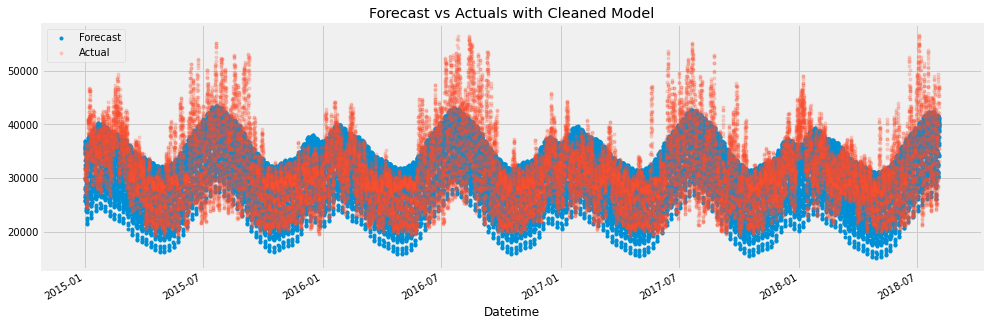

In [ ]:
ax = pjme_test_fcst_clean.set_index('ds')['yhat'] \
    .plot(figsize=(15, 5), lw=0, style='.')
pjme_test['PJME_MW'].plot(ax=ax, style='.', lw=0, alpha=0.2)
plt.legend(['Forecast','Actual'])
plt.title('Forecast vs Actuals with Cleaned Model')
plt.show()

In [ ]:
# Read data and look at features
df_electric=pd.read_csv('/content/sample_data/AEP_hourly.csv', sep=',')
df_electric2=df_movie=pd.read_csv('/content/sample_data/COMED_hourly.csv', sep=',')
df_electric3=df_movie=pd.read_csv('/content/sample_data/DAYTON_hourly.csv', sep=',')
df_electric=pd.read_csv('/content/sample_data/DEOK_hourly.csv', sep=',')
df_electric2=df_movie=pd.read_csv('hourly.csv', sep=',')
df_electric3=df_movie=pd.read_csv('/content/sample_data/COMED_hourly.csv', sep=',')

In [ ]:
# Read data and look at features
data = pd.read_csv('/content/sample_data/AEP_hourly.csv')
print(data.columns)
print(data.head)

Index(['Datetime', 'AEP_MW'], dtype='object')
<bound method NDFrame.head of                    Datetime   AEP_MW
0       2004-12-31 01:00:00  13478.0
1       2004-12-31 02:00:00  12865.0
2       2004-12-31 03:00:00  12577.0
3       2004-12-31 04:00:00  12517.0
4       2004-12-31 05:00:00  12670.0
...                     ...      ...
121268  2018-01-01 20:00:00  21089.0
121269  2018-01-01 21:00:00  20999.0
121270  2018-01-01 22:00:00  20820.0
121271  2018-01-01 23:00:00  20415.0
121272  2018-01-02 00:00:00  19993.0

[121273 rows x 2 columns]>


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from dateutil.relativedelta import relativedelta
import datetime

# Sort data by datetime
data = data.sort_values(by=['Datetime'])

# Convert dates columns into datetime64 type
data['Datetime'] = data['Datetime'].astype('datetime64')

# Conserve only last 3 years of data 
data = data.loc[data['Datetime']>=data['Datetime'][len(data['Datetime'])-1]-relativedelta(years=3)]
data.reset_index(inplace=True)
print(data)

# Scale and center data
scaler = MinMaxScaler()
consumption = scaler.fit_transform(np.reshape(data['AEP_MW'].values,(-1,1)))[:,0]
print(consumption)

       level_0   index            Datetime   AEP_MW
0         5111   93482 2015-08-03 00:00:00  14732.0
1         5112   93435 2015-08-03 01:00:00  13551.0
2         5113   93436 2015-08-03 02:00:00  12857.0
3         5114   93437 2015-08-03 03:00:00  12430.0
4         5115   93438 2015-08-03 04:00:00  12100.0
...        ...     ...                 ...      ...
26300    31411  116157 2018-08-02 20:00:00  17673.0
26301    31412  116158 2018-08-02 21:00:00  17303.0
26302    31413  116159 2018-08-02 22:00:00  17001.0
26303    31414  116160 2018-08-02 23:00:00  15964.0
26304    31415  116161 2018-08-03 00:00:00  14809.0

[26305 rows x 4 columns]
[0.39087874 0.30125968 0.24859615 ... 0.56305964 0.48436789 0.39672181]


In [ ]:
# Create training and testing sets 
ratio = 0.8
split = (int)(np.floor(ratio*len(data)))
input_length = 20

x_train = [consumption[i-input_length:i] for i in range(input_length,split)]
x_test = [consumption[i-input_length:i] for i in range(input_length+split,len(consumption))]
y_train = consumption[input_length:split]
y_test = consumption[input_length+split:]

# Reshape x_train and x_test to fit lstm input
x_train_lstm = np.reshape(x_train,(np.shape(x_train)[0],np.shape(x_train)[1],1))
x_test_lstm = np.reshape(x_test,(np.shape(x_test)[0],np.shape(x_test)[1],1))
# Implement lstm forecaster

# Import deep learning libraries
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense

# Build our model
lstm = Sequential()
 
# Declare the layers
layers = [LSTM(units=128, input_shape=(input_length,1), activation='sigmoid',return_sequences=True),
          LSTM(units=128, activation='sigmoid'),
         Dense(1)]
 
# Add the layers to the model
for layer in layers:
    lstm.add(layer)

# Compile our model
lstm.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
 
# Fit the model
history_lstm = lstm.fit(x_train_lstm, y_train, validation_data=(x_test_lstm,y_test), epochs=3, batch_size=32)

Epoch 1/3
657/657 [==============================] - 28s 42ms/step - loss: 0.0182 - accuracy: 4.7565e-05 - val_loss: 0.0036 - val_accuracy: 1.9080e-04
Epoch 2/3
657/657 [==============================] - 28s 42ms/step - loss: 0.0022 - accuracy: 4.7565e-05 - val_loss: 0.0010 - val_accuracy: 1.9080e-04
Epoch 3/3
657/657 [==============================] - 28s 42ms/step - loss: 0.0012 - accuracy: 4.7565e-05 - val_loss: 6.7230e-04 - val_accuracy: 1.9080e-04


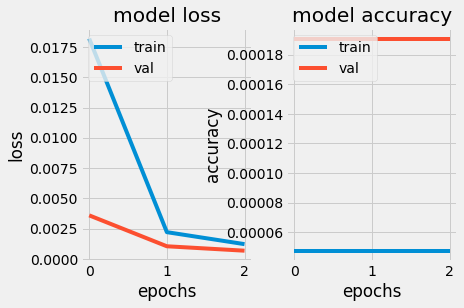

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(121)
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')  
plt.xlabel('epochs')
plt.legend(['train','val'], loc='upper left')

plt.subplot(122)
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epochs')
plt.legend(['train','val'], loc='upper left')
plt.show()

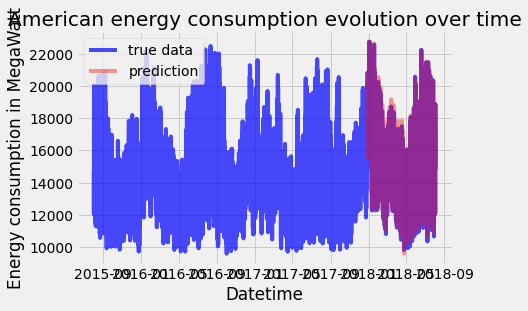

In [ ]:
# Print predictions
predictions = lstm.predict(x_test_lstm)
first_date = data['Datetime'][len(data)-len(y_test)]
predicted_dates = [first_date + datetime.timedelta(hours=i) for i in range(len(x_test))]
plt.figure()
plt.plot(data['Datetime'],scaler.inverse_transform(np.reshape(consumption,(-1,1))),color='b',alpha=0.7)
plt.plot(predicted_dates,scaler.inverse_transform(np.reshape(predictions,(-1,1))),color='r',alpha=0.4)
plt.xlabel('Datetime')
plt.ylabel('Energy consumption in MegaWatt')
plt.title('American energy consumption evolution over time')
plt.legend(['true data','prediction'])
plt.show()

# ARIMA

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
df_electric=pd.read_csv('/content/sample_data/AEP_hourly.csv', sep=',')
df.head(10)

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
5,2004-12-31 06:00:00,13038.0
6,2004-12-31 07:00:00,13692.0
7,2004-12-31 08:00:00,14297.0
8,2004-12-31 09:00:00,14719.0
9,2004-12-31 10:00:00,14941.0


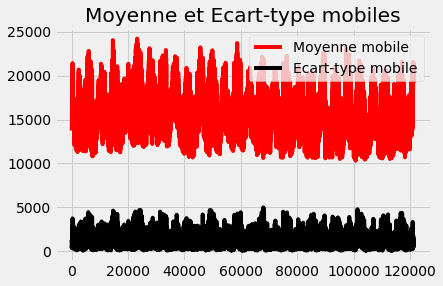

In [ ]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles')
plt.show()

In [ ]:
result = adfuller(df['AEP_MW'])
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -16.446812104686728
p-value : 2.399011324002097e-29
Valeurs Critiques :
	1%: -3.430403955318047
	5%: -2.8615638474512295
	10%: -2.566782693155802


In [ ]:
def get_stationarity(timeseries):
    
    # Statistiques mobiles
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # tracé statistiques mobiles
    original = plt.plot(timeseries, color='blue', label='Origine')
    mean = plt.plot(rolling_mean, color='red', label='Moyenne Mobile')
    std = plt.plot(rolling_std, color='black', label='Ecart-type Mobile')
    plt.legend(loc='best')
    plt.title('Moyenne et écart-type Mobiles')
    plt.show(block=False)
    
    # Test Dickey–Fuller :
    result = adfuller(timeseries['Passengers'])
    print('Statistiques ADF : {}'.format(result[0]))
    print('p-value : {}'.format(result[1]))
    print('Valeurs Critiques :')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
print("fait")

fait


# LSTM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
df=pd.read_csv('/content/sample_data/AEP_hourly.csv', delimiter=';')
print('Number of rows and columns:', df.shape)


Number of rows and columns: (121273, 1)


In [ ]:
df.head(10) 

,"Datetime,AEP_MW"
0,"2004-12-31 01:00:00,13478.0"
1,"2004-12-31 02:00:00,12865.0"
2,"2004-12-31 03:00:00,12577.0"
3,"2004-12-31 04:00:00,12517.0"
4,"2004-12-31 05:00:00,12670.0"
5,"2004-12-31 06:00:00,13038.0"
6,"2004-12-31 07:00:00,13692.0"
7,"2004-12-31 08:00:00,14297.0"
8,"2004-12-31 09:00:00,14719.0"
9,"2004-12-31 10:00:00,14941.0"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Datetime,AEP_MW  121273 non-null  object
dtypes: object(1)
memory usage: 947.6+ KB


In [ ]:
df.dtypes

Datetime,AEP_MW    object
dtype: object

In [ ]:
df.shape

(121273, 1)

In [ ]:
df.describe()

,"Datetime,AEP_MW"
count,121273
unique,121273
top,"2010-12-06 09:00:00,20529.0"
freq,1


In [ ]:
df.columns

Index(['Datetime,AEP_MW'], dtype='object')